# Arnoldi Iteration with Complex Eigenvalues

In [1]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as pt

Let us make a matrix with a defined set of eigenvalues and eigenvectors, given by `eigvals` and `eigvecs`.

In [2]:
np.random.seed(40)

# Generate matrix with eigenvalues 1...25
nhalf = 12
n = 2*nhalf
eigvals = np.zeros(n,dtype=np.complex)
eigvals[0:nhalf] = np.linspace(1., nhalf, nhalf)+1j*np.linspace(1., nhalf, nhalf)
eigvals[nhalf:] = eigvals[0:nhalf].conj()
eigvecs = np.random.randn(n, n)
print(eigvals)

A = la.solve(eigvecs, np.dot(np.diag(eigvals), eigvecs))
print(la.eig(A)[0])

[  1. +1.j   2. +2.j   3. +3.j   4. +4.j   5. +5.j   6. +6.j   7. +7.j
   8. +8.j   9. +9.j  10.+10.j  11.+11.j  12.+12.j   1. -1.j   2. -2.j
   3. -3.j   4. -4.j   5. -5.j   6. -6.j   7. -7.j   8. -8.j   9. -9.j
  10.-10.j  11.-11.j  12.-12.j]
[ 12.-12.j  12.+12.j  11.-11.j  11.+11.j  10.-10.j  10.+10.j   9. +9.j
   9. -9.j   8. -8.j   8. +8.j   7. +7.j   7. -7.j   6. +6.j   5. +5.j
   4. +4.j   3. +3.j   2. +2.j   1. +1.j   6. -6.j   5. -5.j   1. -1.j
   4. -4.j   3. -3.j   2. -2.j]


## Initialization

Set up $Q$ and $H$:

In [3]:
Q = np.zeros((n, n),dtype=np.complex)
H = np.zeros((n, n),dtype=np.complex)

k = 0

Pick a starting vector, normalize it

In [4]:
x0 = np.random.randn(n)#+1j*np.random.randn(n)
x0 = x0/la.norm(x0)

# Poke it into the first column of Q
Q[:, k] = x0

del x0

Make a list to save arrays of Ritz values, including the maximum Ritz value:

In [5]:
ritz_values = []
ritz_max = []

## Algorithm

Carry out one iteration of Arnoldi iteration.

Run this cell in-place (Ctrl-Enter) until H is filled.

23
(12+12j)


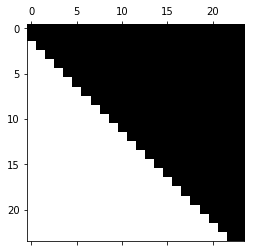

In [29]:
print(k)

u = A @ Q[:, k]

# Carry out Gram-Schmidt on u against Q
for j in range(k+1):
    qj = Q[:, j]
    H[j,k] = np.inner(qj.conj(), u)
    u = u - H[j,k]*qj

if k+1 < n:
    H[k+1, k] = la.norm(u)
    Q[:, k+1] = u/H[k+1, k]

k += 1

pt.spy(H)
D = la.eig(H)[0]
max_ritz = D[np.argmax(np.abs(D))]
print(max_ritz)
ritz_max.append(max_ritz)
ritz_values.append(D)

Check that $Q^T A Q =H$:

In [30]:
la.norm(Q[:,:k-1].T.conj() @ A @ Q[:,:k-1] - H[:k-1,:k-1])/ la.norm(A)

7.6486025612314716e-10

Check that Q is orthogonal:

In [31]:
la.norm((Q.T.conj() @ Q)[:k-1,:k-1] - np.eye(k-1))

1.1067617560433375e-09

Look at convergence of largest Ritz value to dominant eigenvalue

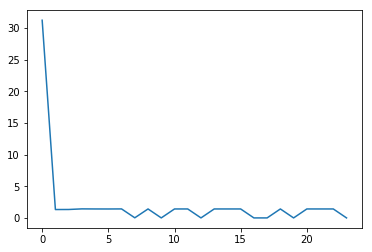

In [32]:
max_eigval = eigvals[np.argmax(np.abs(eigvals))]
pt.plot(np.abs(max_eigval-ritz_max)/np.abs(max_eigval))

## Plot convergence of Ritz values

Enable the Ritz value collection above to make this work.

/home/edgar/environments/py35env/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


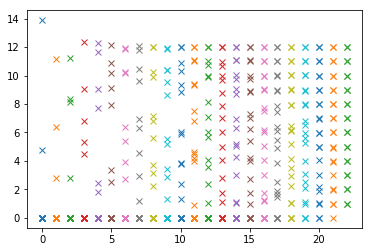

In [39]:
for i, rv in enumerate(ritz_values[1:]):
    pt.plot([i] * len(rv), rv, "x")